In [2]:
# https://www.researchgate.net/publication/350110244_Prediction_of_Wine_Quality_Using_Machine_Learning_Algorithms

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('WineQT.csv')

In [6]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075

In [7]:
df.notnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,True,True,True,True,True,True,True,True,True,True,True,True,True
1139,True,True,True,True,True,True,True,True,True,True,True,True,True
1140,True,True,True,True,True,True,True,True,True,True,True,True,True
1141,True,True,True,True,True,True,True,True,True,True,True,True,True


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
# 1. First of all this is a prediction based Classification Machine learning MOdel
# 2. IN this model, we can use SVM classifier, Random Forest classifier as ensemble learning technique
# 3. In this model, Gradient Boosting, Multilayer Perceptrom Model we can use.

In [10]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


# Data Analysis and visualization and statistical measurement

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [13]:
df.count()

fixed acidity           1143
volatile acidity        1143
citric acid             1143
residual sugar          1143
chlorides               1143
free sulfur dioxide     1143
total sulfur dioxide    1143
density                 1143
pH                      1143
sulphates               1143
alcohol                 1143
quality                 1143
Id                      1143
dtype: int64

In [14]:
# RandomForestClassifier application

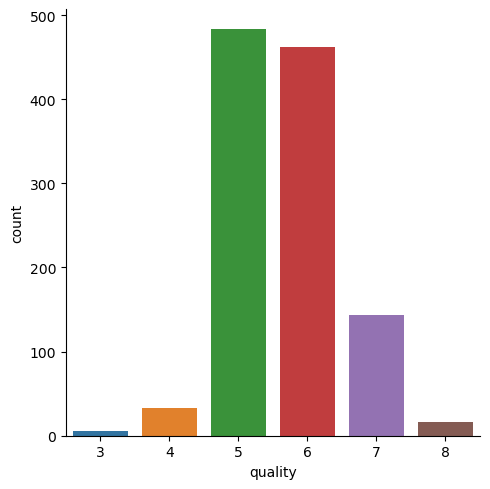

In [15]:
# Number of values for each quality
import seaborn as sns
sns.catplot(x = 'quality', data = df, kind = 'count')

In [16]:
# So from the plot we have totally 6 quality values, the wider ones are bad
# and larger ones are good enough.  

<Axes: xlabel='quality', ylabel='volatile acidity'>

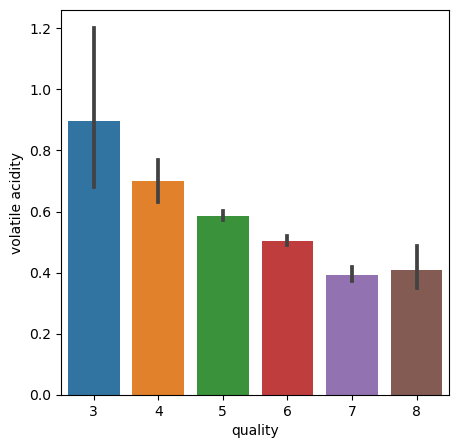

In [17]:
# Volatile Acidity Column vs Quality Column
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

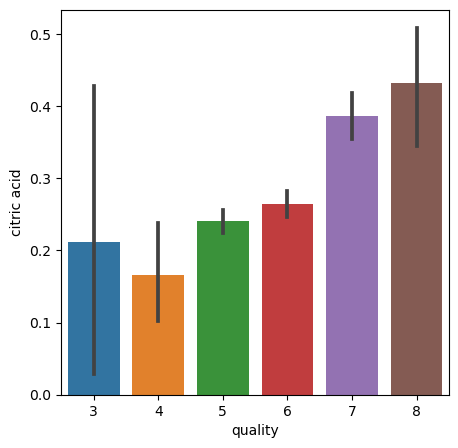

In [18]:
# Citric Acidity Column vs Quality Column

plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<Axes: xlabel='quality', ylabel='residual sugar'>

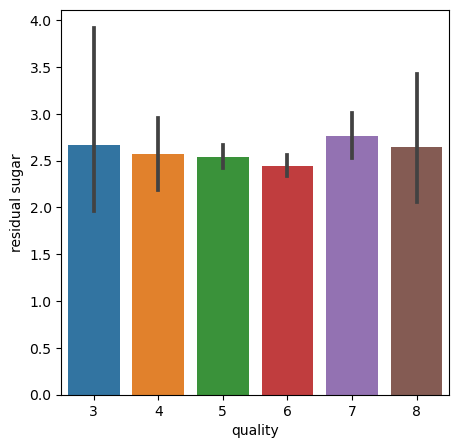

In [20]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

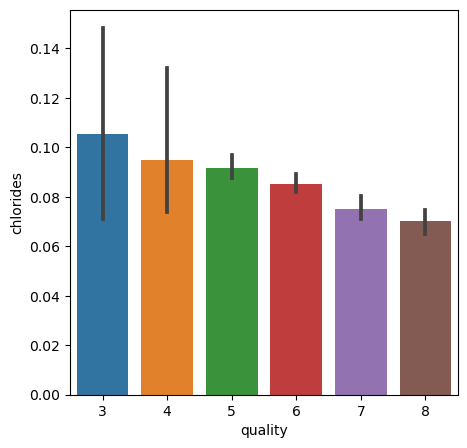

In [21]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

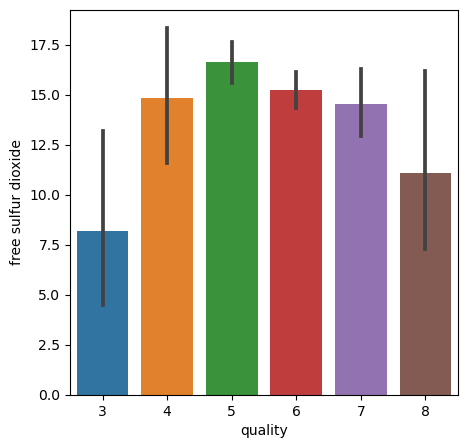

In [22]:
plot = plt.figure(figsize= (5,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

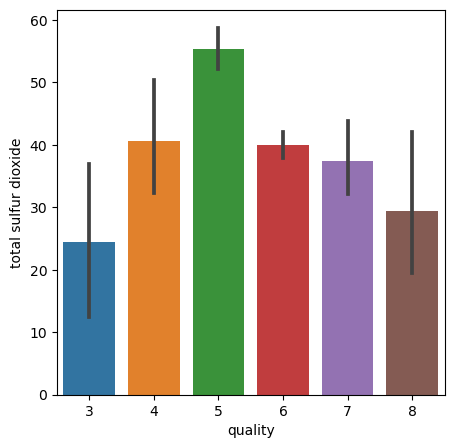

In [23]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

Correlation

In [24]:
correlation = df.corr()

<Axes: >

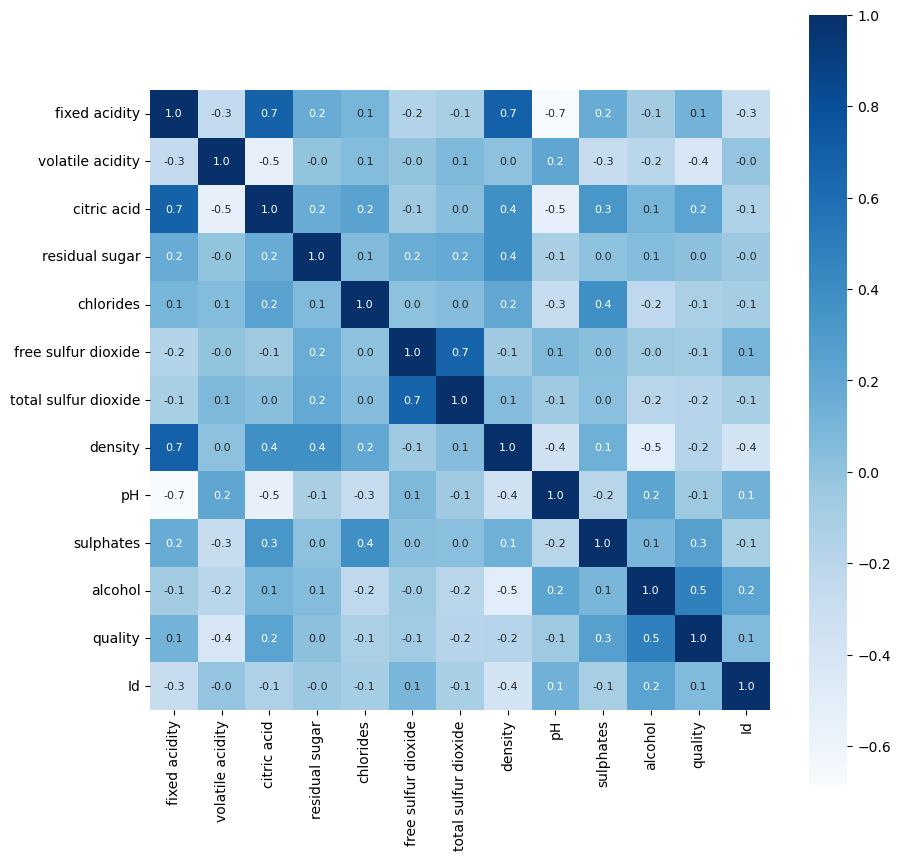

In [25]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws={'size': 8}, cmap = 'Blues')

# Data Preprocessing

In [26]:
# Separate the data and label
# splitting the dataset into two different labels

In [107]:
x = df.drop('quality', axis = 1)
y = df['quality']

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# RandomForestClassifier model

In [161]:
model_rfc = RandomForestClassifier()


In [162]:
model_rfc.fit(x_train, y_train)

RandomForestClassifier()

In [163]:
model_rfc.fit(x_train, y_train)
y_pred = model_rfc.predict(x_test)

accuracy_rfc = accuracy_score(y_test, y_pred)

In [164]:
print(confusion_matrix(y_pred, y_test))

[[ 0  0  0  0  0]
 [ 3 75 28  0  0]
 [ 3 20 64  7  2]
 [ 0  1  7 19  0]
 [ 0  0  0  0  0]]


In [165]:
print(accuracy_rfc)

0.6899563318777293


In [166]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.78      0.71      0.74       106
           6       0.65      0.67      0.66        96
           7       0.73      0.70      0.72        27
           8       0.00      0.00      0.00         0

    accuracy                           0.69       229
   macro avg       0.43      0.42      0.42       229
weighted avg       0.72      0.69      0.70       229



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SUPPORT VECTOR MACHINE

In [167]:
scaler = StandardScaler()

In [168]:
scaler.fit(x_train)

StandardScaler()

In [169]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [170]:
classifier = svm.SVC(kernel = 'linear')

In [171]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [172]:
x_train_predict = classifier.predict(x_train)
accuracy_svc = accuracy_score(y_train, x_train_predict)

In [173]:
print(accuracy_svc)

0.6050328227571116


In [174]:
model_svm = SVC()

In [176]:
model_svm.fit(x_train, y_train)

SVC()

In [177]:
y_pred = model_svm.predict(x_test)
accuracy_without_scaling = accuracy_score(y_pred, y_test)

In [178]:
print(accuracy_without_scaling)

0.6550218340611353


In [69]:
1. Logistic Regression
3. Ridge Regression
4. Gradient Boosting (XGBoost)

SyntaxError: invalid syntax (1879789326.py, line 1)

# Logistic Regression

In [119]:
 model_logistic = LogisticRegression()

In [120]:
model_logistic.fit(x_train, y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
x_test_prediction = model_logistic.predict(x_test)
accuracy_lr = accuracy_score(x_test_prediction, y_test)

In [123]:
print(accuracy_lr)

0.537117903930131


# Ridge Resgression

In [128]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [130]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(x_test, y_test)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {sqrt(mse)}")
print(f"R-Squared Error: {r_squared}")

Mean Squared Error: 0.38427947598253276
Root Mean Squared Error: 0.6199027955918031
R-Squared Error: 0.6943231441048034


# Extreme Gradient Boosting

In [158]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

model_xgb = xgb.XGBClassifier()

# Convert the target variable to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model_xgb.fit(x_train, y_train_encoded)

y_pred_encoded = model_xgb.predict(x_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy_xgb = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy in XGBoost: {accuracy_xgb}")

print("Classification Report:")
report = classification_report(y_test_encoded, y_pred_encoded)
print(report)


Accuracy in XGBoost: 0.6768558951965066
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         6
           2       0.71      0.76      0.73        96
           3       0.66      0.65      0.65        99
           4       0.69      0.69      0.69        26
           5       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.34      0.35      0.35       229
weighted avg       0.66      0.68      0.67       229



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Building a predictive System

In [187]:
input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1)

# Changing the input data to a numpy array

numpy_array = np.asarray(input_data)

# Reshape thenumpy array as we are predicting the label for only one instance
data_reshape = numpy_array.reshape(1, -1)

prediction = model.predict(data_reshape)

print(prediction)

if (prediction[0] == 1):
    print("Good Quality Wine")
else:
    print("Bad Quality wine")

[5]
Bad Quality wine


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
